# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pylab as plt

from PyPower import *

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split as tts 

from sklearn.preprocessing import StandardScaler         

import statsmodels.api as sm

from statsmodels.formula.api import ols

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [72]:
# Lista de edades (Age)
ages = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]

# Lista de retardos (Tardies)
tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


student_data = pd.DataFrame({'Age': ages, 'Tardies': tardies})

In [73]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

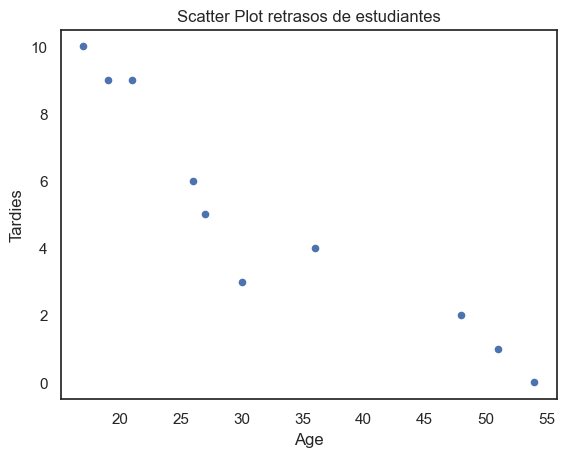

In [74]:
student_data.sort_values(['Age', 'Tardies'], ascending=True).plot.scatter(x='Age', y='Tardies')

plt.title('Scatter Plot retrasos de estudiantes')
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Con pequeñas variaciones, hay una relación inversamente proporcional entre edad y retrasos.  A más edad, menos retrasos

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [75]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [76]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Ambas matrices explican la relación entre las variables. 
La matriz de covarianza es menos precisa porque son valores proporcionales a las magnitudes. Por eso la matriz de correlación es más clara. 
Tal como expliqué antes, se puede ver que la relación entre Edad y Retrasos es inversamente proporcional, y eso lo dice el -0.94 entre ellas.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [77]:
X = student_data.Age.values.reshape(-1, 1) 

y = student_data.Tardies


In [78]:
# Inicializo y entreno el modelo
linReg =  LinearRegression()


linReg.fit(X, y)

y_pred = linReg.predict(X)

In [79]:
linReg.intercept_ 

12.888803363135771

Plot your regression model on your scatter plot.

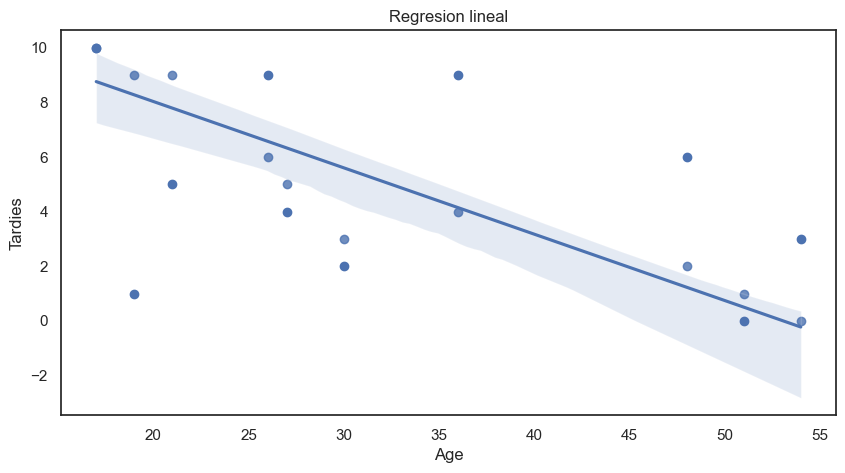

In [80]:
x = np.linspace(int(student_data.Age.min()), int(student_data.Age.max()), 10)

plt.figure(figsize=(10, 5))

#y = linReg.coef_*x + linReg.intercept_          #y = mx+b

# datos
plt.scatter(student_data.Age.sort_values(ascending=True), student_data.Tardies)

#Regplot es una función de seaborn para pintar regresiones y su intérvalo de confianza, yeiii
sns.regplot(x = "Age", y = "Tardies", data = student_data, dropna = True)

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Según la línea de regresión, efectivamente la relación es inversamente proporcional. 
Por tanto si, depende de la edad el retraso. 
Es lo que dicen inequívocamente los datos.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [2]:
vehicles = pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

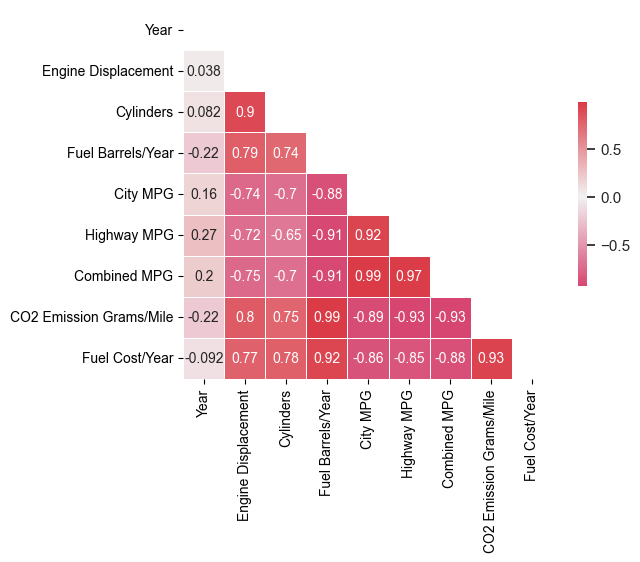

In [3]:
plot_corr(vehicles, 10)

Según la matríz de correlación 'Fuel Barrels/Year' y los valores de millas por galón (MPG) en autovía, combinados y de ciudad.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [4]:
vehicles = column_unification(vehicles)

In [12]:
#Separo las variables

X = vehicles.drop(columns = ['co2_emission_grams/mile'])

y = vehicles['co2_emission_grams/mile']

In [13]:
#Normalizo Train
X = pd.DataFrame(StandardScaler().fit_transform(X._get_numeric_data()), 
                      columns=X._get_numeric_data().columns)

In [15]:
#Aplico el modelo ols

x_norm=sm.add_constant(X[[
    
    'year',
    'engine_displacement',
    'cylinders',
    'fuel_barrels/year',
    'city_mpg',
    'highway_mpg',
    'combined_mpg',
    'fuel_cost/year'
    
]])


modelo=sm.OLS(y, x_norm).fit()

pred=modelo.predict(x_norm)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams/mile   R-squared:                       0.983
Model:                                 OLS   Adj. R-squared:                  0.983
Method:                      Least Squares   F-statistic:                 2.559e+05
Date:                     Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                             17:30:26   Log-Likelihood:            -1.4987e+05
No. Observations:                    35952   AIC:                         2.998e+05
Df Residuals:                        35943   BIC:                         2.998e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 475.3163      0.082   5762.602      0.000     475.155     475.478
year                   -3.0919      0.096    -32.300      0.000      -3.279      -2.904
engine_displacement     9.0525      0.218     41.543      0.000       8.625       9.480
cylinders              -2.0297      0.210     -9.649      0.000      -2.442      -1.617
fuel_barrels/year      77.9561      0.284    274.510      0.000      77.399      78.513
city_mpg                4.1519      0.743      5.585      0.000       2.695       5.609
highway_mpg           -14.2158      0.525    -27.094      0.000     -15.244     -13.187
combined_mpg           -7.0190      1.172     -5.991      0.000      -9.316      -4.722
fuel_cost/year         19.0504      0.238     80.102      0.000      18.584      19.517
==============================================================================
Omnibus:                    65974.989   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        162004990.275
Skew:                          13.520   Prob(JB):                         0.00
Kurtosis:                     330.744   Cond. No.                         42.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Ahora aplico el modelo sin normalizar

vehicles = vehicles.dropna()

column_unification(vehicles)

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrels/year,city_mpg,highway_mpg,combined_mpg,co2_emission_grams/mile,fuel_cost/year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [ ]:
#Aplico el modelo ols

x=sm.add_constant(vehicles[[
    
    'year',
    'engine_displacement',
    'cylinders',
    'fuel_barrels/year',
    'city_mpg',
    'highway_mpg',
    'combined_mpg',
    'fuel_cost/year'
    
]]

)

y=vehicles['co2_emission_grams/mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     co2_emission_grams/mile   R-squared:                       0.983
Model:                                 OLS   Adj. R-squared:                  0.983
Method:                      Least Squares   F-statistic:                 2.559e+05
Date:                     Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                             12:35:52   Log-Likelihood:            -1.4987e+05
No. Observations:                    35952   AIC:                         2.998e+05
Df Residuals:                        35943   BIC:                         2.998e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 764.3433     18.897     40.448      0.000     727.304     801.382
year                   -0.3066      0.009    -32.300      0.000      -0.325      -0.288
engine_displacement     6.6593      0.160     41.543      0.000       6.345       6.974
cylinders              -1.1563      0.120     -9.649      0.000      -1.391      -0.921
fuel_barrels/year      17.4507      0.064    274.510      0.000      17.326      17.575
city_mpg                0.8706      0.156      5.585      0.000       0.565       1.176
highway_mpg            -2.4132      0.089    -27.094      0.000      -2.588      -2.239
combined_mpg           -1.3730      0.229     -5.991      0.000      -1.822      -0.924
fuel_cost/year          0.0376      0.000     80.102      0.000       0.037       0.038
==============================================================================
Omnibus:                    65974.989   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        162004990.275
Skew:                          13.520   Prob(JB):                         0.00
Kurtosis:                     330.744   Cond. No.                     6.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

El modelo con los datos normalizados y no normalizados, demuestran que todas las variables son significativamente importantes para el cálculo de la emisión de CO2.

Jaime, eres tu? Recuerdas que vimos esto porque había normalizado todo y por eso me daba coeficiente 1 el beta 0? :) gracias por tu ayuda

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 